<a href="https://colab.research.google.com/github/shvnshnn02/PCVK_Ganjil_2023/blob/main/week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except:
  print('Error, not a number')

original = cv.imread('/content/sample_data/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


NameError: ignored

Tugas Praktikum

1. Implementasi inverse citra




 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


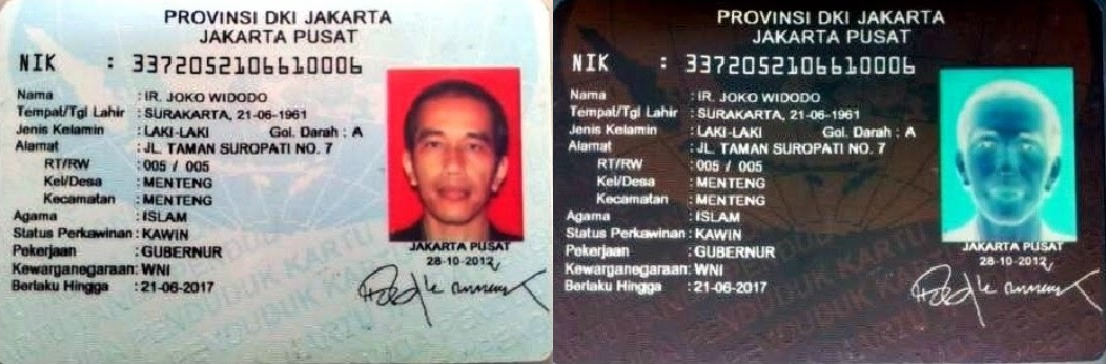

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv2.imread('/content/sample_data/KTP.jpg')

# Inversi citra
inverted_image = 255 - original

final_frame = cv2.hconcat((original, inverted_image))
cv2_imshow(final_frame)

2. Implementasi transformasi contrast


 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukan tingkat kecerahan [-255 - 255]:50
Masukkan kontras [1.0 - 3.0]:2


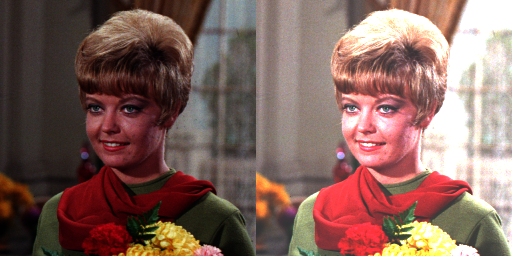

In [ ]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

try:
  brightness = int(input('Masukan tingkat kecerahan [-255 - 255]:'))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/sample_data/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasi transformasi logarithmic brightnes

 Mengubah tingkat kecerahan citra dengan Transformasi Log
----------------------------------------------
Masukkan nilai kecerahan:50


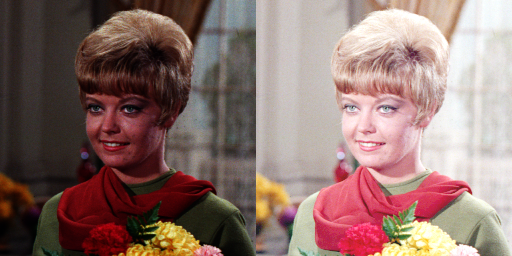

In [ ]:
print(' Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('----------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan:'))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/sample_data/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*  (np.log(1 + original[y,x,c])), 0 , 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

4. Implementasi Transformasi Grayscale dengan metode averaging, lightness, dan luminance

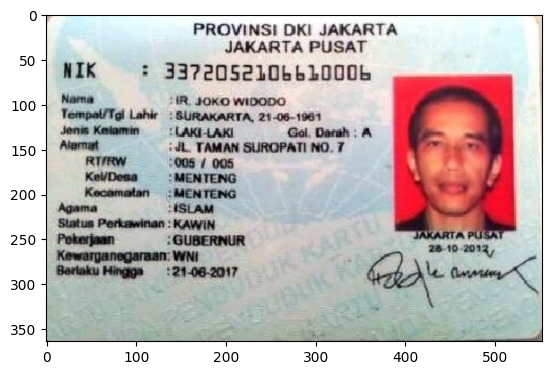

In [ ]:
img = cv.imread('/content/sample_data/KTP.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)


A. Averaging

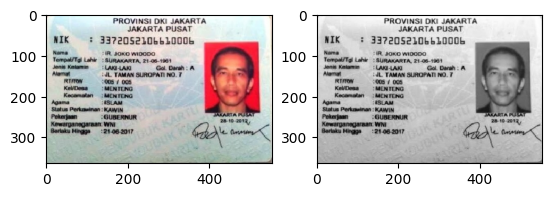

In [ ]:
img_avg = cv.imread('/content/sample_data/KTP.jpg')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

B. Lightness

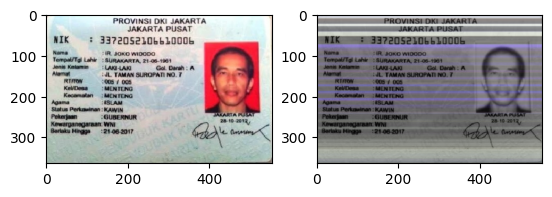

In [ ]:
img_light = cv.imread('/content/sample_data/KTP.jpg')
img_light[:] = np.max(img_light, axis=-1, keepdims=100)/2 + np.min(img_light, axis=-2, keepdims=100)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

C. Luminance

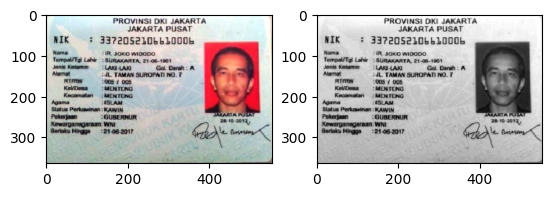

In [ ]:
img_lum = cv.imread('/content/sample_data/KTP.jpg')
R, G, B = img_lum[: , : , 0], img_lum[: , : , 1], img_lum[: , : , 2]
gray_img_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_img_lum, cmap = 'gray')

5. Menampilkan Warna tertentu dan ubah warna lain menjadi Grayscale

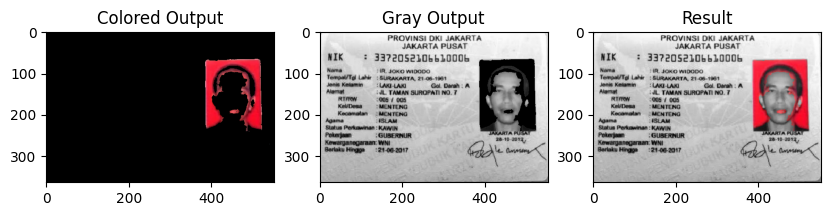

In [ ]:
img = cv2.imread('/content/sample_data/KTP.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.merge([gray, gray, gray])

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower = np.array([35, 90, 88])
upper = np.array([179, 255, 255])

mask = cv2.inRange(hsv, lower, upper)

colored_output = cv2.bitwise_and(img, img, mask=mask)

gray_output = cv2.bitwise_and(gray, gray, mask=255-mask)

result = cv2.add(colored_output, gray_output)

plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(colored_output, cv2.COLOR_BGR2RGB))
plt.title('Colored Output')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(gray_output, cv2.COLOR_BGR2RGB))
plt.title('Gray Output')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Result')

plt.show()
